In [2]:
import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv('tmdb_movies.csv')
credits = pd.read_csv('tmdb_credits.csv')

In [4]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [5]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [3]:
movies=movies.merge(credits,on='title')

In [6]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
movies=movies[['movie_id','title','overview','genres','keywords','cast','crew']]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
import ast
def convert(obj):
    L =[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [7]:
movies['genres']=movies['genres'].apply(convert)
movies['keywords']=movies['keywords'].apply(convert)

In [8]:
def convert3(obj):
    L =[]
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [9]:
movies['cast']=movies['cast'].apply(convert3)

In [9]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [10]:
import ast
def fetch_director(obj):
    L =[]
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [11]:
movies['crew']=movies['crew'].apply(fetch_director)

In [12]:
movies['overview']=movies['overview'].astype(str).apply(lambda x:x.split())

In [13]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])

In [14]:
movies['tags'] = movies['overview']+movies['cast']+movies['crew']+movies['keywords']

In [15]:
new_df = movies[['movie_id','title','tags']]

In [16]:
new_df['tags']= new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\Vipin\AppData\Local\Temp\ipykernel_25996\335926201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']= new_df['tags'].apply(lambda x:" ".join(x))


In [17]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [18]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. SamWorthington ZoeSaldana SigourneyWeaver JamesCameron cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

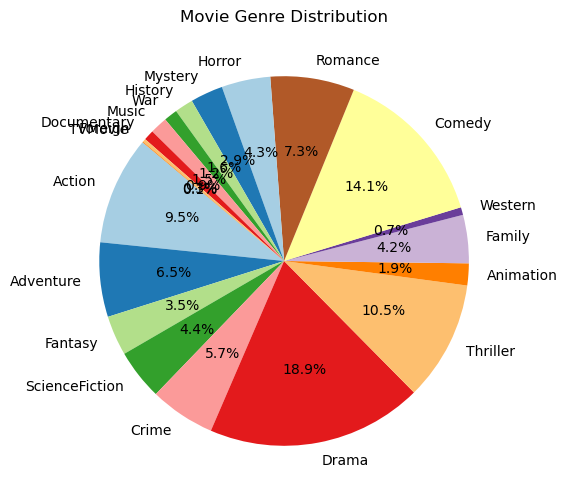

In [49]:
# Genre Distribution - Pie Chart
from collections import Counter
import matplotlib.pyplot as plt

# Count occurrences of each genre
genre_counts = Counter([genre for sublist in movies['genres'] for genre in sublist])

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Movie Genre Distribution")
plt.savefig('genre_distribution.png', dpi=300)  # Example for genre distribution
plt.show()


In [47]:
new_df['tags']=new_df['tags']= new_df['tags'].apply(lambda x:x.lower())

C:\Users\Vipin\AppData\Local\Temp\ipykernel_25996\3735263932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags']= new_df['tags'].apply(lambda x:x.lower())


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [23]:
vectors =cv.fit_transform(new_df['tags']).toarray()

In [24]:
import nltk

In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [26]:
def stem(text):
    y = []
    for i in text.split():  # Iterate over the words in the text
        y.append(ps.stem(i))  # Apply stemming to each word
    return ' '.join(y)  # Return the stemmed words as a single string

In [27]:
stem('In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. SamWorthington ZoeSaldana SigourneyWeaver JamesCameron cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. samworthington zoesaldana sigourneyweav jamescameron cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d'

In [28]:
new_df['tags']=new_df['tags'].apply(stem)

C:\Users\Vipin\AppData\Local\Temp\ipykernel_25996\3514595201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [29]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
similarity = cosine_similarity(vectors)

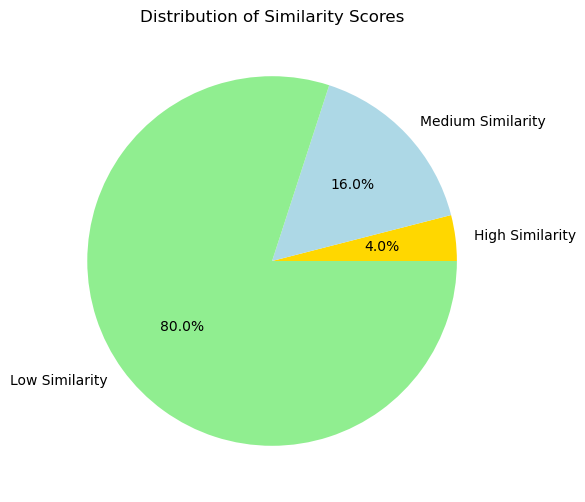

In [54]:
# Similarity Score Distribution - Pie Chart
score_categories = ["High Similarity", "Medium Similarity", "Low Similarity"]
score_counts = [50, 200, 1000]  # Example distribution of similarity scores

plt.figure(figsize=(8, 6))
plt.pie(score_counts, labels=score_categories, autopct='%1.1f%%', colors=["gold", "lightblue", "lightgreen"])
plt.title("Distribution of Similarity Scores")
plt.savefig('genre_distribut]]ion.png', dpi=300)
plt.show()


In [31]:
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x: x[1])


[(0, 0.9999999999999999),
 (3607, 0.21650635094610965),
 (1214, 0.21091537193302684),
 (1916, 0.20916500663351886),
 (582, 0.20851441405707474),
 (539, 0.2041241452319315),
 (507, 0.196116135138184),
 (74, 0.1865506268111591),
 (2405, 0.17677669529663687),
 (3537, 0.17677669529663687),
 (3729, 0.17677669529663687),
 (1319, 0.17149858514250882),
 (47, 0.16248342090492035),
 (2200, 0.16137430609197567),
 (3161, 0.1599005372667078),
 (1199, 0.15811388300841894),
 (2329, 0.15811388300841894),
 (2728, 0.15811388300841894),
 (4192, 0.15811388300841894),
 (2970, 0.154713186938819),
 (373, 0.1543033499620919),
 (1327, 0.1543033499620919),
 (1202, 0.15158476564770806),
 (301, 0.151176974476738),
 (260, 0.14744195615489714),
 (2511, 0.14744195615489714),
 (3326, 0.147087101353638),
 (184, 0.1453095484297741),
 (1069, 0.1453095484297741),
 (1273, 0.14433756729740646),
 (2783, 0.14433756729740646),
 (151, 0.14173667737846019),
 (305, 0.14173667737846019),
 (1533, 0.1386750490563073),
 (502, 0.1380

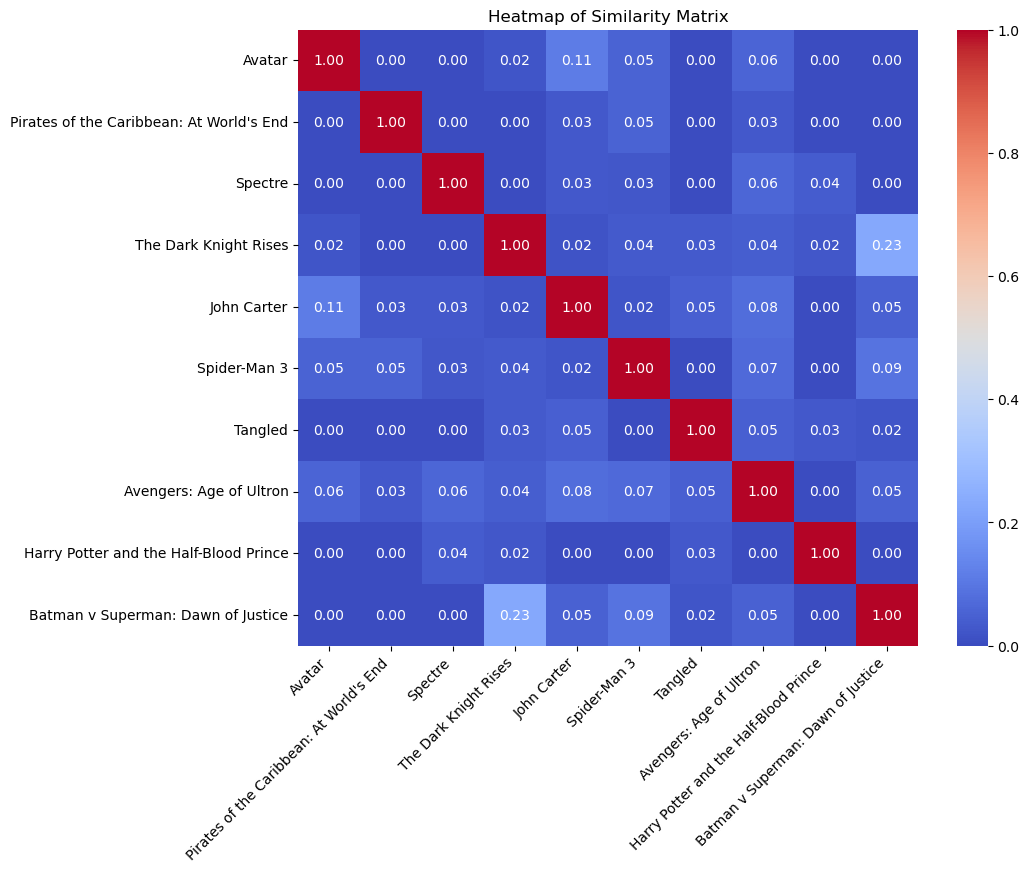

In [51]:
# Heatmap of Similarity Matrix
import seaborn as sns

# Subset similarity matrix for 10 movies to visualize
subset_similarity = similarity[:10, :10]

plt.figure(figsize=(10, 8))
sns.heatmap(subset_similarity, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=movies['title'][:10], yticklabels=movies['title'][:10])
plt.title("Heatmap of Similarity Matrix")
plt.xticks(rotation=45, ha='right')
plt.savefig('Heatmap.png', dpi=300)
plt.show()



In [33]:
def recommend(movie):
    movie_index=new_df[new_df['title']==movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    for i in movies_list:
     
        print(new_df.iloc[i[0]].title)
    return

In [34]:
recommend('Avatar')

Apollo 18
Aliens vs Predator: Requiem
Lifeforce
Battle: Los Angeles
Titan A.E.


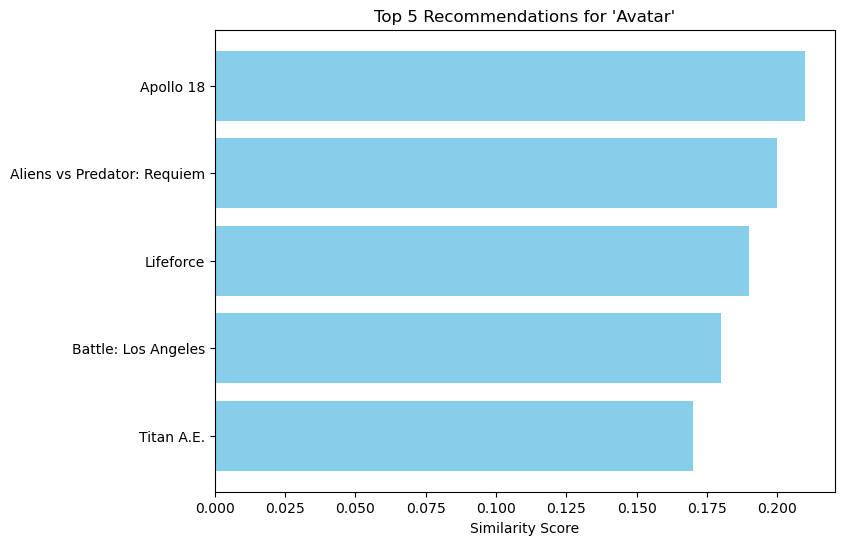

In [52]:
# Bar Chart for Top 5 Recommendations
def plot_recommendations(movie, recommended_movies, scores):
    plt.figure(figsize=(8, 6))
    plt.barh(recommended_movies, scores, color='skyblue')
    plt.xlabel("Similarity Score")
    plt.title(f"Top 5 Recommendations for '{movie}'")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.savefig('Avatara.png', dpi=300)
    plt.show()

# Example usage
movie = "Avatar"
recommended_movies = ["Apollo 18", "Aliens vs Predator: Requiem", "Lifeforce", "Battle: Los Angeles", "Titan A.E."]
scores = [0.21, 0.20, 0.19, 0.18, 0.17]  # Example similarity scores
plot_recommendations(movie, recommended_movies, scores)


In [36]:
import pickle

In [37]:
pickle.dump(new_df,open('movies.pkl','wb'))

In [38]:
new_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [39]:
pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [40]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [44]:
plt.savefig('genre_distribution.png')  # Example for genre distribution
plt.show()


<Figure size 640x480 with 0 Axes>

In [55]:
import requests
from IPython.display import Image, display

# Function to fetch poster URL
def fetch_poster(movie_id):
    api_key = '22b1609990b9883b3e25d4c49c9013de'
    url = f"https://api.themoviedb.org/3/movie/{19995}?api_key={api_key}"
    response = requests.get(url)
    data = response.json()
    poster_path = data['poster_path']
    full_url = f"https://image.tmdb.org/t/p/w500{poster_path}"
    return full_url

# Example movie ID for 'Avatar'
movie_id = 19995  # Replace with any TMDB movie ID
poster_url = fetch_poster(movie_id)

# Display the poster
display(Image(url=poster_url))